In [1]:
!pip install pyshp

In [4]:
import zipfile
import os

zip_path = "ABW_ADM0.zip"
extract_to = "unzipped_ABW_ADM0"

# Create the folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract all files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ Extracted files to: {os.path.abspath(extract_to)}")


✅ Extracted files to: /home/jovyan/Automation and Workflows/geoGuardian/unzipped_ABW_ADM0


In [5]:
import shapefile
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a Reader object
sf = shapefile.Reader(os.path.join(extract_to, "ABW_ADM0.shp"))

# Get information about the shapes
print(f"Number of shapes: {len(sf.shapes())}")
print(f"Shape types: {[s.shapeTypeName for s in sf.shapes()]}")

# Access individual shapes and their attributes
for i, shape in enumerate(sf.shapes()):
    print(f"\nShape {i}:")
    print(f"  Shape type: {shape.shapeTypeName}")
    print(f"  Bounding box: {shape.bbox}")
    print(f"  Number of points: {len(shape.points)}")
    # Access attributes (records)
    record = sf.record(i)
    print(f"  Attributes: {record}")

# Get field names and types
print("\nFields:")
for field in sf.fields[1:]:  # Skip the first field (DeletionFlag)
    print(f"  Name: {field[0]}, Type: {field[1]}")

Number of shapes: 1
Shape types: ['POLYGON']

Shape 0:
  Shape type: POLYGON
  Bounding box: [-70.0635823286371, 12.412075397674244, -69.86604279765925, 12.623178269663924]
  Number of points: 7721
  Attributes: Record #0: ['Aruba', 'ADM0', 'ABW']

Fields:
  Name: Name, Type: C
  Name: Level, Type: C
  Name: ISO_Code, Type: C


In [6]:
sf.shapes()[0].bbox

[-70.0635823286371, 12.412075397674244, -69.86604279765925, 12.623178269663924]

In [8]:
gdf = gpd.read_file('unzipped_ABW_ADM0/ABW_ADM0.shp')
gdf

,Name,Level,ISO_Code,geometry
0,Aruba,ADM0,ABW,"MULTIPOLYGON (((-69.98437 12.4698, -69.98435 1..."


<Axes: >

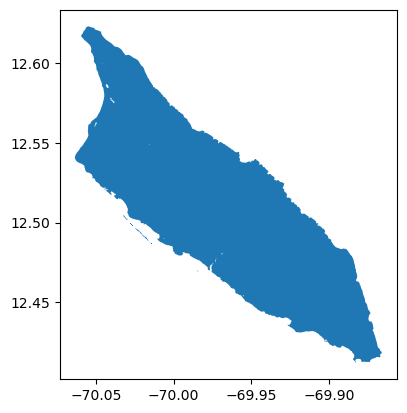

In [9]:
gdf.plot()